# Noisy harmonic oszillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Stationary solution of the harmonic oscillator, with damping and noise
niter=1000000
gamma=0.1
mu, sigma = 0, 0.1
#
# Parameters
dt=1.0e-3
l=2.5
sqrdt=np.sqrt(dt)
amp=1.
#
# Filename
fname='D.npz'
# Initial condition
xiter=0.0
viter=1.0
#
# Let's do a first run
xvmax=0
for i in np.arange(niter):
    xsave=xiter
    xiter=xiter+viter*dt
    viter=viter-(gamma*viter+xsave)*dt+amp*np.random.normal(mu, sigma)*sqrdt
    if np.max([xiter,viter]) > xvmax: xvmax=np.max([xiter,viter])
# Now we start the iteration
#x[0]=xiter
#v[0]=viter
#for i in np.arange(1,10*niter):
# Integrate one step forward by simple Euler step - to improve
#    x[i]=x[i-1]+v[i-1]*dt
#    v[i]=v[i-1]-(gamma*v[i-1]+x[i-1])*dt+amp*np.random.normal(mu, sigma)*sqrdt
#
# l=np.max([np.abs(x.min()),np.abs(x.max()),np.abs(v.min()),np.abs(x.max())])*1.1
l=xvmax*1.1

In [ ]:
# Identify the box size
# here dragons be!!! 
dx=l/100.
nx=2*int(l/dx)
nv=2*int(l/dx)
Dx=np.zeros((nx,nv))
Dv=np.zeros((nx,nv))
Dxx=np.zeros((nx,nv))
Dvx=np.zeros((nx,nv))
Dxv=np.zeros((nx,nv))
Dvv=np.zeros((nx,nv))
Count=np.ones((nx,nv)).astype(int)
#
xold=xiter
vold=viter

In [ ]:
# Iterate and fill the drift and Diffusion coefficient matrices
for i in np.arange(1000):
# Those are the "derivatives"
    xnew=xold+vold*dt
    vnew=vold-(gamma*vold+xold)*dt+amp*np.random.normal(mu, sigma)*sqrdt
    xd=(xnew-xold)/dt
    vd=(vnew-vold)/dt
    xold=xnew
    vold=vnew
#
    xindex=(np.floor((xnew+l)/dx)).astype(int)
    vindex=(np.floor((vnew+l)/dx)).astype(int)
    #print(xindex,vindex,end='\r')
    if xindex<nx and vindex<nv:
        #print(xindex,vindex,xd,vd)
        Count[xindex,vindex]+=1
        Dx[xindex,vindex]+=xd
        Dv[xindex,vindex]+=vd
        Dxx[xindex,vindex]+=xd*xd
        Dxv[xindex,vindex]+=xd*vd
        Dvx[xindex,vindex]+=vd*xd
        Dvv[xindex,vindex]+=vd*vd
#
#
Dx=Dx/Count
Dv=Dv/Count
Dxx=Dxx/Count
Dxv=Dxv/Count
Dvv=Dvv/Count
np.savez('D.npz', 'wb', Dx=Dx,Dv=Dv,Dxx=Dxx,Dxv=Dxv,Dvv=Dvv)

<IPython.core.display.Javascript object>


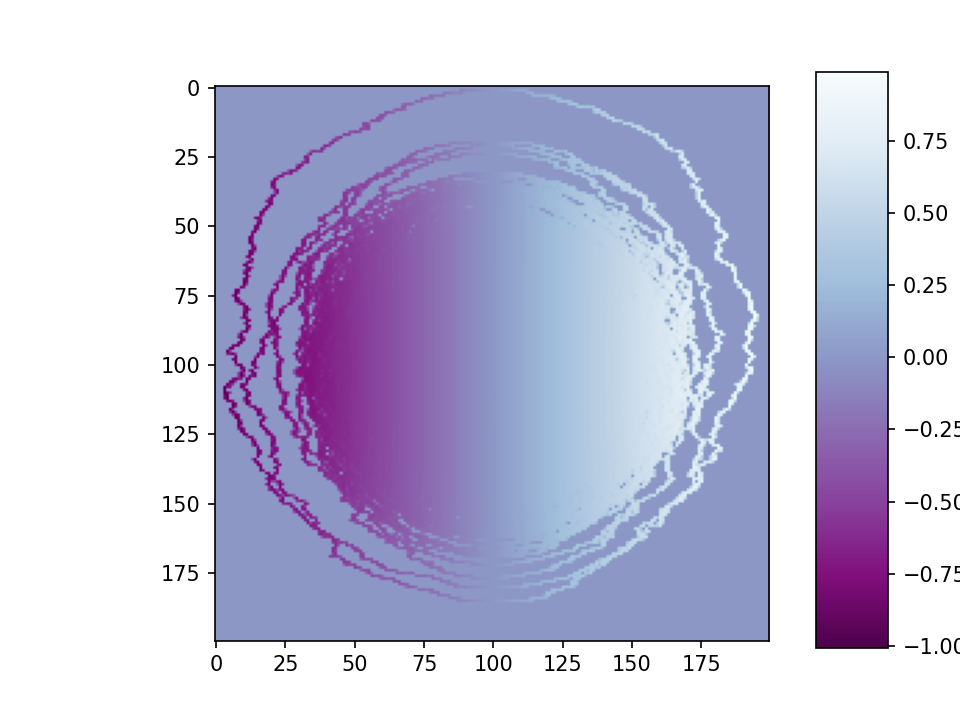

In [5]:
%matplotlib notebook
Data=np.load('D.npz')
Dx=Data['Dx']
Dv=Data['Dv']
Dxx=Data['Dxx']
Dxv=Data['Dxv']
Dvv=Data['Dvv']
#plt.imshow(Data['Dvv'],cmap=plt.cm.BuPu_r)
plt.imshow(Dx,cmap=plt.cm.BuPu_r)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

In [2]:
#%matplotlib notebook
#Nullen= Count==0
#CountPlus=Count.copy()
#CountPlus[Nullen]=1
#xcoords,vcoords=np.meshgrid(np.arange(2*int(l/dx)),np.arange(2*int(l/dx)))
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot(xcoords,vcoords,Dvv/CountPlus)
# et voilà, the values of D at the positions (x,v) are -x

In [ ]:
l

In [ ]:
Data=np.load('D.npz')

In [ ]:
Data['Dx'].min()

In [7]:
int(10e10)

100000000000